In [1]:
import pydicom
import os
import pydicom
import cv2
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from skimage.transform import resize
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import MaxPool3D
from PIL import Image
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

main_dir = 'D:\\DBT\\'
label_dir = main_dir + 'BCS-DBT labels-train-v2.csv'
labels_df = pd.read_csv(label_dir)
view_series = labels_df.iloc[0]
print(view_series)
main_dir = 'D:\\DBT\\manifest-1691398083946\\'
data_dir = main_dir + 'Breast-Cancer-Screening-DBT\\'

def read_images(data_dir, num_images=5):
    img_dict = {}
    for folder0_dir in os.listdir(data_dir):
        patient_id = folder0_dir
        if not folder0_dir.startswith('DBT'): 
            continue
        folder0_dir = os.path.join(data_dir,folder0_dir)
        for folder1_dir in os.listdir(folder0_dir):
            folder1_dir = os.path.join(folder0_dir,folder1_dir)
            for folder2_dir in os.listdir(folder1_dir):
                case_id = patient_id +'_' + folder2_dir
                folder2_dir = os.path.join(folder1_dir,folder2_dir)
                png_paths = sorted([os.path.join(folder2_dir, path) for path in os.listdir(folder2_dir) if path.endswith('.png')])
                split_size = len(png_paths) // num_images
                selected_paths = [png_paths[i*split_size] for i in range(num_images)]
                img_list = []
                print(f'处理{case_id}中')
                for png_path in selected_paths:
                    img = Image.open(png_path)
                    new_size = (110,80)
                    img = img.convert('L') 
                    img = img.resize(new_size, Image.LANCZOS)
                    img_array = np.array(img)
                    img_array = standardize_image(img_array)
                    img_list.append(img_array)
                
                img_dict[case_id] = np.stack(img_list, axis=0)
    return img_dict

def standardize_image(image):
    standardized_image = image / np.max(image)
    return standardized_image

img_dict = read_images(data_dir,20)

print('处理完成!')

导入库成功!
PatientID     DBT-P00013
StudyUID      DBT-S00163
View                rmlo
Normal                 0
Actionable             0
Benign                 1
Cancer                 0
Name: 0, dtype: object
处理DBT-P00013_20566.000000-NA-32081中
处理DBT-P00023_19710.000000-NA-51654中
处理DBT-P00023_19711.000000-NA-14072中
处理DBT-P00023_19712.000000-NA-09387中
处理DBT-P00023_19713.000000-NA-61579中
处理DBT-P00024_14782.000000-NA-91029中
处理DBT-P00024_14783.000000-NA-53289中
处理DBT-P00029_229.000000-NA-39407中
处理DBT-P00029_230.000000-NA-30080中
处理DBT-P00029_231.000000-NA-99185中
处理DBT-P00029_232.000000-NA-42826中
处理DBT-P00032_9670.000000-NA-95147中
处理DBT-P00032_9671.000000-NA-81650中
处理DBT-P00032_9672.000000-NA-52664中
处理DBT-P00032_9673.000000-NA-01012中
处理DBT-P00045_2665.000000-NA-56730中
处理DBT-P00045_2666.000000-NA-26372中
处理DBT-P00045_2667.000000-NA-29110中
处理DBT-P00045_2668.000000-NA-80894中
处理DBT-P00052_2861.000000-NA-84115中
处理DBT-P00052_2862.000000-NA-19991中
处理DBT-P00052_2863.000000-NA-05408中
处理DBT-P00052_2864.0000

处理DBT-P01267_19688.000000-NA-16007中
处理DBT-P01267_19689.000000-NA-24374中
处理DBT-P01282_1737.000000-NA-14534中
处理DBT-P01282_1738.000000-NA-68814中
处理DBT-P01347_3990.000000-NA-95139中
处理DBT-P01347_3991.000000-NA-47293中
处理DBT-P01347_3992.000000-NA-13434中
处理DBT-P01439_5189.000000-NA-33192中
处理DBT-P01461_20284.000000-NA-24547中
处理DBT-P01461_20285.000000-NA-73584中
处理DBT-P01488_9196.000000-NA-13599中
处理DBT-P01488_9197.000000-NA-04594中
处理DBT-P01493_3537.000000-NA-41887中
处理DBT-P01493_3538.000000-NA-07093中
处理DBT-P01539_14136.000000-NA-76114中
处理DBT-P01539_14137.000000-NA-96589中
处理DBT-P01587_13051.000000-NA-06426中
处理DBT-P01587_13052.000000-NA-97181中
处理DBT-P01624_5179.000000-NA-07086中
处理DBT-P01624_5180.000000-NA-11459中
处理DBT-P01626_1029.000000-NA-41286中
处理DBT-P01626_1030.000000-NA-12792中
处理DBT-P01673_12558.000000-NA-63058中
处理DBT-P01673_12559.000000-NA-24133中
处理DBT-P01712_9194.000000-NA-43456中
处理DBT-P01712_9195.000000-NA-84984中
处理DBT-P01718_6813.000000-NA-32583中
处理DBT-P01718_6814.000000-NA-90142中
处理DBT-P017

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

def read_images(data_dir, slice_number=5):
    img_dict = {}
    for folder0_dir in os.listdir(data_dir):
        patient_id = folder0_dir
        if not folder0_dir.startswith('DBT'): 
            continue
        folder0_dir = os.path.join(data_dir,folder0_dir)
        for folder1_dir in os.listdir(folder0_dir):
            folder1_dir = os.path.join(folder0_dir,folder1_dir)
            for folder2_dir in os.listdir(folder1_dir):
                case_id = patient_id +'_' + folder2_dir
                folder2_dir = os.path.join(folder1_dir,folder2_dir)
                png_paths = [os.path.join(folder2_dir, path) for path in os.listdir(folder2_dir) if path.endswith('.png')]
                selected_paths = random.sample(png_paths, slice_number)
                img_list = []
                print(f'处理{case_id}中')
                for png_path in selected_paths:
                    img = Image.open(png_path)
                    new_size = (110,80)
                    img = img.convert('L') 
                    img = img.resize(new_size, Image.LANCZOS)
                    img_array = np.array(img)
                    img_array = standardize_image(img_array)
                    img_array = img_array.reshape((1,) + img_array.shape + (1,))
                    for batch in datagen.flow(img_array, batch_size=1):
                        img_array = batch[0].reshape(img_array.shape[1:3]) 
                        break
                    img_list.append(img_array)
                img_dict[case_id] = np.stack(img_list, axis=0)
    return img_dict

img_dict = read_images(data_dir, 20)

print('处理完成!')

处理DBT-P00013_20566.000000-NA-32081中
处理DBT-P00023_19710.000000-NA-51654中
处理DBT-P00023_19711.000000-NA-14072中
处理DBT-P00023_19712.000000-NA-09387中
处理DBT-P00023_19713.000000-NA-61579中
处理DBT-P00024_14782.000000-NA-91029中
处理DBT-P00024_14783.000000-NA-53289中
处理DBT-P00029_229.000000-NA-39407中
处理DBT-P00029_230.000000-NA-30080中
处理DBT-P00029_231.000000-NA-99185中
处理DBT-P00029_232.000000-NA-42826中
处理DBT-P00032_9670.000000-NA-95147中
处理DBT-P00032_9671.000000-NA-81650中
处理DBT-P00032_9672.000000-NA-52664中
处理DBT-P00032_9673.000000-NA-01012中
处理DBT-P00045_2665.000000-NA-56730中
处理DBT-P00045_2666.000000-NA-26372中
处理DBT-P00045_2667.000000-NA-29110中
处理DBT-P00045_2668.000000-NA-80894中
处理DBT-P00052_2861.000000-NA-84115中
处理DBT-P00052_2862.000000-NA-19991中
处理DBT-P00052_2863.000000-NA-05408中
处理DBT-P00052_2864.000000-NA-10096中
处理DBT-P00060_10132.000000-NA-67888中
处理DBT-P00064_20252.000000-NA-27294中
处理DBT-P00064_20253.000000-NA-31042中
处理DBT-P00064_20254.000000-NA-55116中
处理DBT-P00064_20255.000000-NA-52213中
处理DBT-P00064

处理DBT-P01347_3992.000000-NA-13434中
处理DBT-P01439_5189.000000-NA-33192中
处理DBT-P01461_20284.000000-NA-24547中
处理DBT-P01461_20285.000000-NA-73584中
处理DBT-P01488_9196.000000-NA-13599中
处理DBT-P01488_9197.000000-NA-04594中
处理DBT-P01493_3537.000000-NA-41887中
处理DBT-P01493_3538.000000-NA-07093中
处理DBT-P01539_14136.000000-NA-76114中
处理DBT-P01539_14137.000000-NA-96589中
处理DBT-P01587_13051.000000-NA-06426中
处理DBT-P01587_13052.000000-NA-97181中
处理DBT-P01624_5179.000000-NA-07086中
处理DBT-P01624_5180.000000-NA-11459中
处理DBT-P01626_1029.000000-NA-41286中
处理DBT-P01626_1030.000000-NA-12792中
处理DBT-P01673_12558.000000-NA-63058中
处理DBT-P01673_12559.000000-NA-24133中
处理DBT-P01712_9194.000000-NA-43456中
处理DBT-P01712_9195.000000-NA-84984中
处理DBT-P01718_6813.000000-NA-32583中
处理DBT-P01718_6814.000000-NA-90142中
处理DBT-P01745_15690.000000-NA-44302中
处理DBT-P01745_15691.000000-NA-81114中
处理DBT-P01751_16074.000000-NA-65721中
处理DBT-P01753_8978.000000-NA-75393中
处理DBT-P01753_8979.000000-NA-56601中
处理DBT-P01801_839.000000-NA-76312中
处理DBT-P018

In [9]:
print("字典的大小是:", len(img_dict))

字典的大小是: 337


In [10]:
labels_df_unique = labels_df.drop_duplicates(subset='PatientID', keep='first') 
label_mapping = {'Normal': 0, 'Actionable': 1, 'Benign': 2, 'Cancer': 3}
X = []
y = []
for patient_id, img in img_dict.items():
    patient_id = patient_id.split("_")[0]
    if patient_id in labels_df_unique['PatientID'].values:
        X.append(img)
        label = labels_df_unique.loc[labels_df_unique['PatientID'] == patient_id, ['Normal', 'Actionable', 'Benign', 'Cancer']].values[0]
        y.append(label)
X = np.array(X)
X = np.expand_dims(X, axis=-1)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)     
print(len(img_dict))
print('划分完成！')

(337, 20, 80, 110, 1)
(337, 4)
337
划分完成！


Normal: 100
Actionable: 84
Benign: 77
Cancer: 76


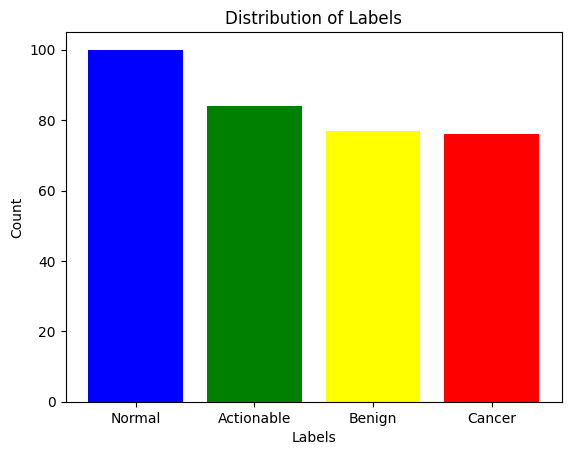

In [11]:
import numpy as np
label_sums = y.sum(axis=0)
label_mapping = {'Normal': 0, 'Actionable': 1, 'Benign': 2, 'Cancer': 3}
for label_name, index in label_mapping.items():
    print(f"{label_name}: {label_sums[index]}")
import matplotlib.pyplot as plt
plt.bar(label_mapping.keys(), label_sums, color=['blue', 'green', 'yellow', 'red'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()